<a href="https://colab.research.google.com/github/mm79Code/LROPTI_CNN/blob/main/LR_STEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Learning Rate = Step Based**

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/Need/Up/Mash/Updated/Covid19-dataset/train'

Normal_dir = os.path.join(base_dir, 'Normal')
Covid_dir = os.path.join(base_dir, 'Covid')
Viral_Pneumonia_dir = os.path.join(base_dir, 'Viral Pneumonia')

print('total training Normal images:', len(os.listdir(Normal_dir)))
print('total training Covid images:', len(os.listdir(Covid_dir)))
print('total training Viral Pneumonia images:', len(os.listdir(Viral_Pneumonia_dir)))

Normal_files = os.listdir(Normal_dir)
print(Normal_files[:10])

Covid_files = os.listdir(Covid_dir)
print(Covid_files[:10])

Viral_Pneumonia_files = os.listdir(Viral_Pneumonia_dir)
print(Viral_Pneumonia_files[:10])

total training Normal images: 70
total training Covid images: 111
total training Viral Pneumonia images: 70
['019.jpeg', '018.jpeg', '010.jpeg', '011.jpeg', '017.jpeg', '016.jpeg', '01.jpeg', '015.jpeg', '014.jpeg', '012.jpeg']
['015.jpg', '019.png', '010.png', '02.jpeg', '012.jpeg', '01.jpeg', '042.jpeg', '040.jpeg', '031.jpeg', '03.jpeg']
['035.jpeg', '032.jpeg', '044.jpeg', '020.jpeg', '01.jpeg', '010.jpeg', '048.jpeg', '04.jpeg', '02.jpeg', '023.jpeg']


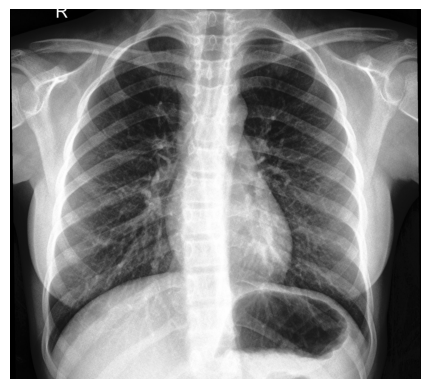

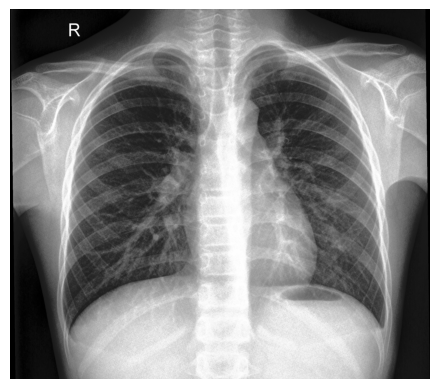

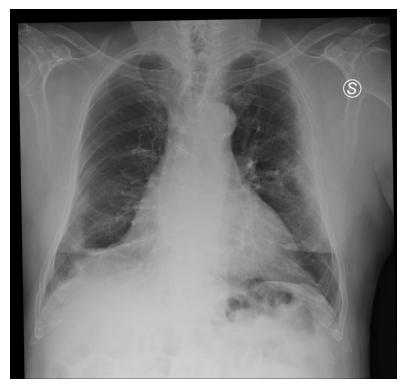

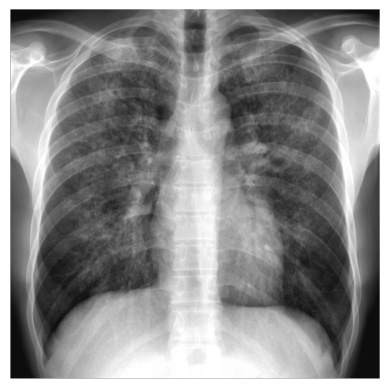

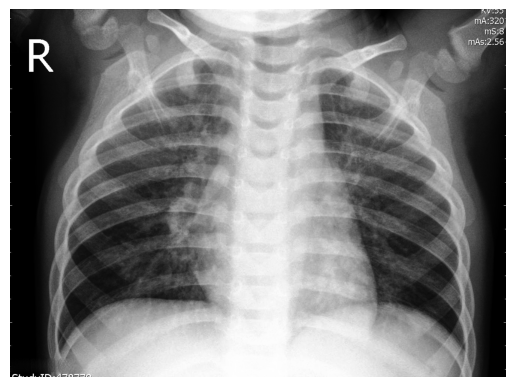

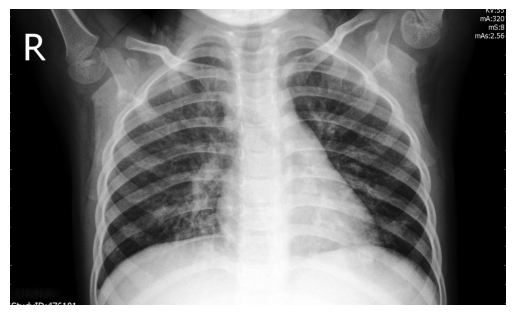

In [ ]:
import matplotlib.image as mpimg
pic_index = 2

next_Normal = [os.path.join(Normal_dir, fname)
                for fname in Normal_files[pic_index-2:pic_index]]
next_Covid = [os.path.join(Covid_dir, fname)
                for fname in Covid_files[pic_index-2:pic_index]]
next_Viral_Pneumonia = [os.path.join(Viral_Pneumonia_dir, fname)
                for fname in Viral_Pneumonia_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Normal+next_Covid+next_Viral_Pneumonia):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
train_dir = '/content/drive/MyDrive/Need/Up/Mash/Updated/Covid19-dataset/train'
train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

validation_dir = '/content/drive/MyDrive/Need/Up/Mash/Updated/Covid19-dataset/test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
	train_dir,
	target_size=(255,255),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	validation_dir,
	target_size=(255,255),
	class_mode='categorical',
  batch_size=16
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


### **Model Implementation**

In [ ]:
# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
epoch = 100

### **Learning Rate**

In [ ]:
def step_lr(epoch, initial_lr=1e-3, drop_rate=0.5, epochs_drop=10):
    return initial_lr * (drop_rate ** np.floor((1 + epoch) / epochs_drop))

initial_lr = 1e-3
lr_scheduler = LearningRateScheduler(lambda epoch: step_lr(epoch, initial_lr))

### **Optimizer = Adam**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=epoch,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3/3 [==============================] - 12s 3s/step - loss: 0.7994 - accuracy: 0.6257 - val_loss: 1.1533 - val_accuracy: 0.5208 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 9s 3s/step - loss: 0.5972 - accuracy: 0.7112 - val_loss: 0.6243 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 9s 3s/step - loss: 0.5154 - accuracy: 0.7604 - val_loss: 0.7732 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 10s 4s/step - loss: 0.4217 - accuracy: 0.8177 - val_loss: 0.7302 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 10s 4s/step - loss: 0.5337 - accuracy: 0.7917 - val_loss: 0.4619 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 10s 3s/step - loss: 0.3645 - accuracy: 0.8449 - val_loss: 0.9157 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 9s 3s/step - loss: 0.3999 - accuracy: 0

In [ ]:
epochs_completed = len(history.history['loss'])
print(f"Training stopped at epoch: {epochs_completed}")

Training stopped at epoch: 15


In [ ]:
Adam_loss = history.history['loss']
Adam_acc = history.history['accuracy']

print(Adam_loss)
print(Adam_acc)

[0.7994226217269897, 0.5971918106079102, 0.51541668176651, 0.42170286178588867, 0.5336530208587646, 0.3644549548625946, 0.39987820386886597, 0.4211333990097046, 0.37364912033081055, 0.35653987526893616, 0.3975602388381958, 0.45949888229370117, 0.31079351902008057, 0.31644612550735474, 0.3581126034259796]
[0.625668466091156, 0.7112299203872681, 0.7604166865348816, 0.8177083134651184, 0.7916666865348816, 0.8449198007583618, 0.8342245817184448, 0.8177083134651184, 0.859375, 0.8877005577087402, 0.8502673506736755, 0.8502673506736755, 0.8609625697135925, 0.8823529481887817, 0.8609625697135925]


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Optimizer: Adam, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Optimizer: Adam, Validation Loss: 0.6307922005653381, Validation Accuracy: 0.7121211886405945


In [ ]:
loss, accuracy = model.evaluate(train_generator, verbose=0)
print(f"Optimizer: Adam, Training Loss: {loss}, Training Accuracy: {accuracy}")

Optimizer: Adam, Training Loss: 0.4056943655014038, Training Accuracy: 0.8366534113883972


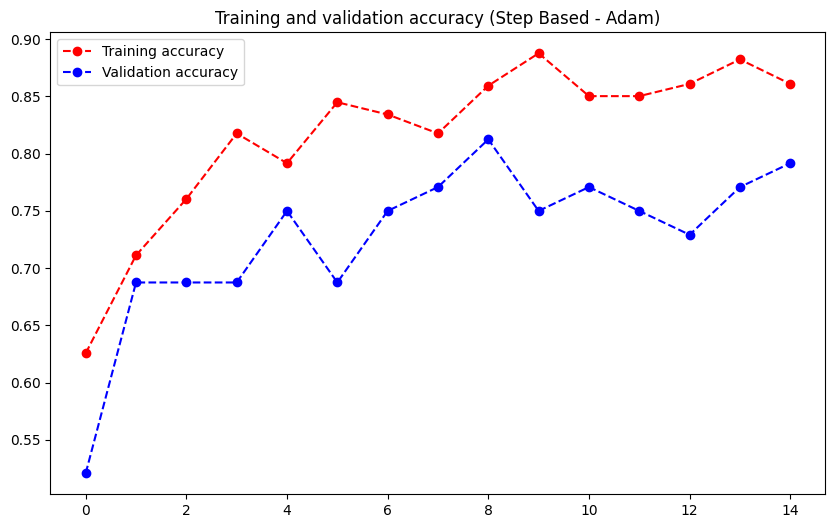

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training accuracy', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation accuracy (Step Based - Adam)')
plt.legend(loc=0)

plt.show()

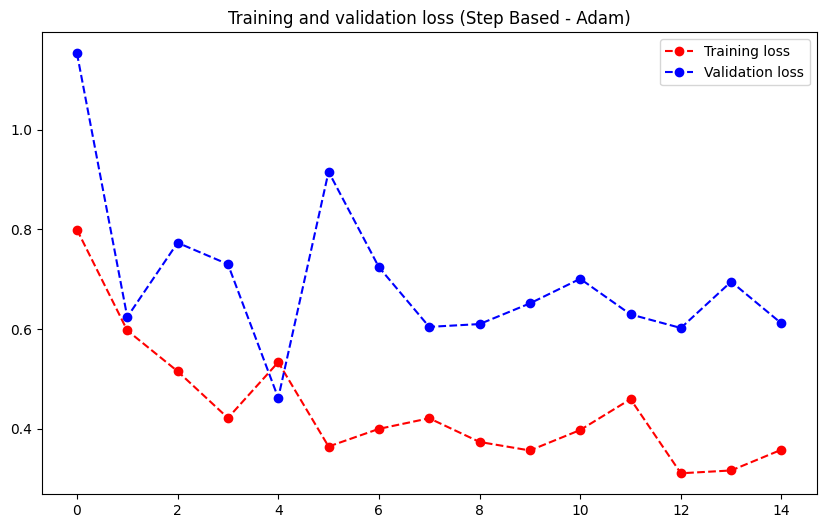

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training loss', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_loss, 'b', label='Validation loss', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation loss (Step Based - Adam)')
plt.legend(loc=0)

plt.show()

### **Optimizer = Adagrad**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=Adagrad(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=epoch,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3/3 [==============================] - 12s 3s/step - loss: 0.4449 - accuracy: 0.8075 - val_loss: 0.5362 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 10s 4s/step - loss: 0.3741 - accuracy: 0.8342 - val_loss: 0.6876 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 9s 3s/step - loss: 0.4144 - accuracy: 0.8542 - val_loss: 0.6038 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 9s 3s/step - loss: 0.3913 - accuracy: 0.8342 - val_loss: 0.7403 - val_accuracy: 0.6458 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 10s 4s/step - loss: 0.3520 - accuracy: 0.8610 - val_loss: 0.5649 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 0.3548 - accuracy: 0.8717 - val_loss: 0.7752 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 0.3731 - accuracy: 0.

In [ ]:
epochs_completed = len(history.history['loss'])
print(f"Training stopped at epoch: {epochs_completed}")

Training stopped at epoch: 11


In [ ]:
Adagrad_loss = history.history['loss']
Adagrad_acc = history.history['accuracy']

print(Adagrad_loss)
print(Adagrad_acc)

[0.4449118673801422, 0.37414535880088806, 0.4144243001937866, 0.3912956118583679, 0.3519730567932129, 0.3548154830932617, 0.373106986284256, 0.35004737973213196, 0.42771753668785095, 0.28384557366371155, 0.38577112555503845]
[0.8074866533279419, 0.8342245817184448, 0.8541666865348816, 0.8342245817184448, 0.8609625697135925, 0.8716577291488647, 0.866310179233551, 0.8502673506736755, 0.8541666865348816, 0.8877005577087402, 0.8342245817184448]


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Optimizer: Adagrad, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Optimizer: Adagrad, Validation Loss: 0.6645119190216064, Validation Accuracy: 0.6969696879386902


In [ ]:
loss, accuracy = model.evaluate(train_generator, verbose=0)
print(f"Optimizer: Adagrad, Training Loss: {loss}, Training Accuracy: {accuracy}")

Optimizer: Adagrad, Training Loss: 0.4109377861022949, Training Accuracy: 0.8326693177223206


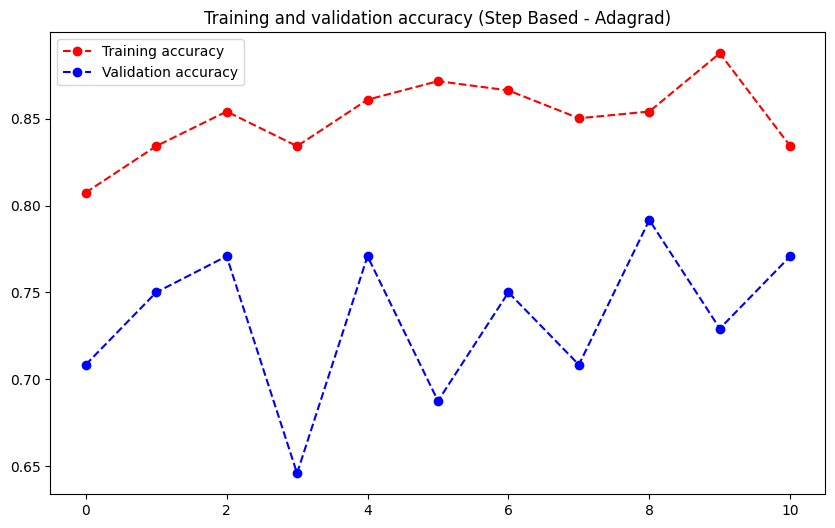

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training accuracy', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation accuracy (Step Based - Adagrad)')
plt.legend(loc=0)

plt.show()

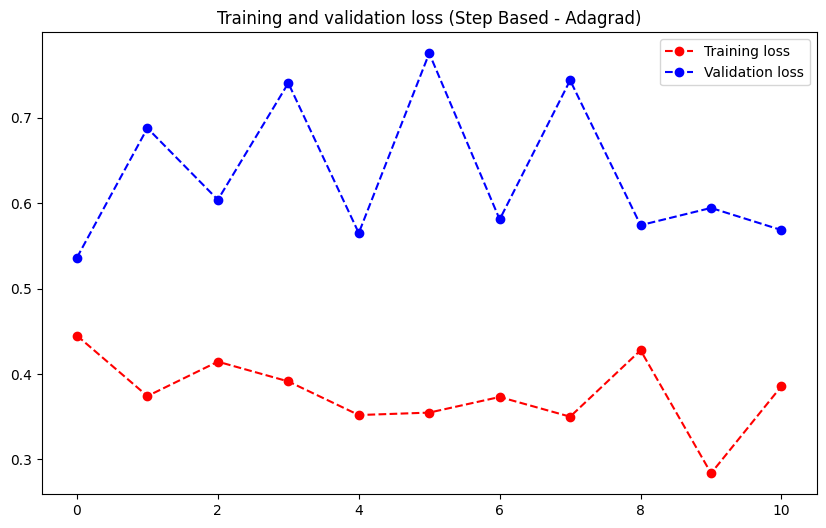

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training loss', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_loss, 'b', label='Validation loss', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation loss (Step Based - Adagrad)')
plt.legend(loc=0)

plt.show()

### **Optimizer = RMSprop**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=epoch,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3/3 [==============================] - 12s 3s/step - loss: 2.7618 - accuracy: 0.4479 - val_loss: 0.9870 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 11s 4s/step - loss: 1.3113 - accuracy: 0.5936 - val_loss: 0.6004 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 9s 4s/step - loss: 0.6716 - accuracy: 0.6771 - val_loss: 1.2183 - val_accuracy: 0.3542 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 0.7847 - accuracy: 0.6096 - val_loss: 0.6148 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 9s 3s/step - loss: 0.5011 - accuracy: 0.8235 - val_loss: 0.9439 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 10s 4s/step - loss: 0.4892 - accuracy: 0.8128 - val_loss: 1.0971 - val_accuracy: 0.7292 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 8s 3s/step - loss: 0.5749 - accuracy: 0.

In [ ]:
epochs_completed = len(history.history['loss'])
print(f"Training stopped at epoch: {epochs_completed}")

Training stopped at epoch: 38


In [ ]:
RMSprop_loss = history.history['loss']
RMSprop_acc = history.history['accuracy']

print(RMSprop_loss)
print(RMSprop_acc)

[2.761823892593384, 1.3112767934799194, 0.6715724468231201, 0.7847246527671814, 0.501132071018219, 0.4891888499259949, 0.5749381184577942, 0.7606218457221985, 0.45008042454719543, 0.4364394247531891, 0.4462946951389313, 0.3508871793746948, 0.41929683089256287, 0.43779808282852173, 0.4298131465911865, 0.5045952796936035, 0.2959126830101013, 0.35609468817710876, 0.29604971408843994, 0.30305516719818115, 0.3265918791294098, 0.3772238790988922, 0.23616346716880798, 0.24543851613998413, 0.37981900572776794, 0.2608851492404938, 0.32762348651885986, 0.3933463990688324, 0.21202313899993896, 0.20741917192935944, 0.2921958565711975, 0.3282645046710968, 0.28041404485702515, 0.29773756861686707, 0.2907753884792328, 0.26203182339668274, 0.24875298142433167, 0.24897372722625732]
[0.4479166567325592, 0.5935828685760498, 0.6770833134651184, 0.6096256971359253, 0.8235294222831726, 0.8128342032432556, 0.7540106773376465, 0.6737967729568481, 0.8128342032432556, 0.8333333134651184, 0.8021390438079834, 0.8

In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Optimizer: RMSprop, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Optimizer: RMSprop, Validation Loss: 0.4615105986595154, Validation Accuracy: 0.8181818127632141


In [ ]:
loss, accuracy = model.evaluate(train_generator, verbose=0)
print(f"Optimizer: RMSprop, Training Loss: {loss}, Training Accuracy: {accuracy}")

Optimizer: RMSprop, Training Loss: 0.32807067036628723, Training Accuracy: 0.8565737009048462


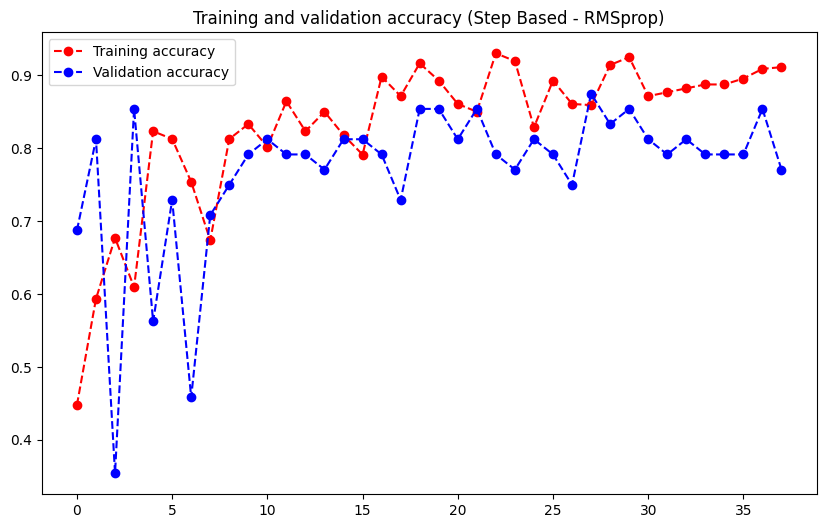

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training accuracy', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation accuracy (Step Based - RMSprop)')
plt.legend(loc=0)

plt.show()

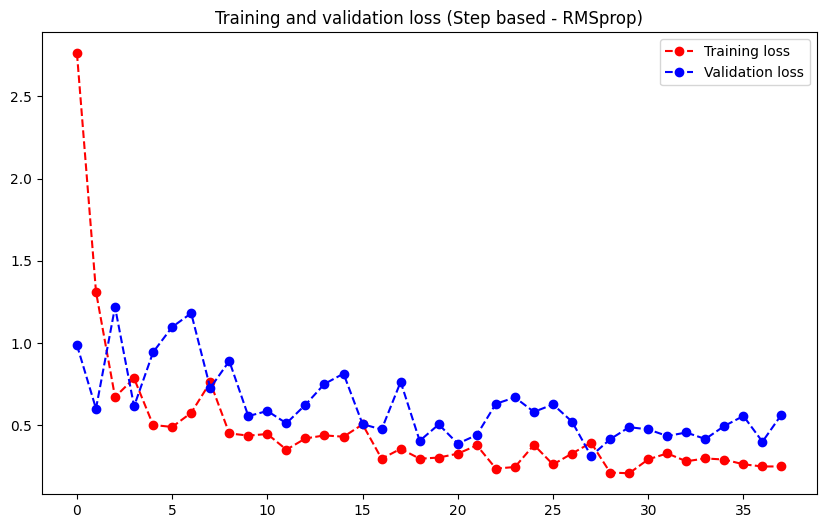

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training loss', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_loss, 'b', label='Validation loss', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation loss (Step based - RMSprop)')
plt.legend(loc=0)

plt.show()

### **Optimizer = SGD**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=epoch,
                    steps_per_epoch=3,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=3, callbacks=[early_stopping, lr_scheduler])

Epoch 1/100
3/3 [==============================] - 13s 4s/step - loss: 0.3054 - accuracy: 0.9037 - val_loss: 0.5888 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 10s 4s/step - loss: 0.2917 - accuracy: 0.8930 - val_loss: 0.5139 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 10s 4s/step - loss: 0.3469 - accuracy: 0.8770 - val_loss: 0.4977 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 8s 3s/step - loss: 0.2358 - accuracy: 0.9305 - val_loss: 0.4342 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 9s 3s/step - loss: 0.3447 - accuracy: 0.8802 - val_loss: 0.4596 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/100
3/3 [==============================] - 12s 4s/step - loss: 0.3330 - accuracy: 0.8594 - val_loss: 0.5773 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 7/100
3/3 [==============================] - 9s 4s/step - loss: 0.3766 - accuracy: 0

In [ ]:
epochs_completed = len(history.history['loss'])
print(f"Training stopped at epoch: {epochs_completed}")

Training stopped at epoch: 17


In [ ]:
SGD_loss = history.history['loss']
SGD_acc = history.history['accuracy']

print(SGD_loss)
print(SGD_acc)

[0.30543413758277893, 0.2917480170726776, 0.3469284474849701, 0.2357615977525711, 0.34473124146461487, 0.33302614092826843, 0.3765864372253418, 0.28557685017585754, 0.2808358073234558, 0.33419570326805115, 0.21797123551368713, 0.26919180154800415, 0.3351682424545288, 0.2913207709789276, 0.28857308626174927, 0.297420471906662, 0.2833911180496216]
[0.903743326663971, 0.893048107624054, 0.8770053386688232, 0.9304812550544739, 0.8802083134651184, 0.859375, 0.859375, 0.9090909361839294, 0.9090909361839294, 0.8770053386688232, 0.9251337051391602, 0.9251337051391602, 0.8823529481887817, 0.9090909361839294, 0.8983957171440125, 0.9166666865348816, 0.8983957171440125]


In [ ]:
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"Optimizer: SGD, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Optimizer: SGD, Validation Loss: 0.494310200214386, Validation Accuracy: 0.7878788113594055


In [ ]:
loss, accuracy = model.evaluate(train_generator, verbose=0)
print(f"Optimizer: SGD, Training Loss: {loss}, Training Accuracy: {accuracy}")

Optimizer: SGD, Training Loss: 0.3121964633464813, Training Accuracy: 0.9083665609359741


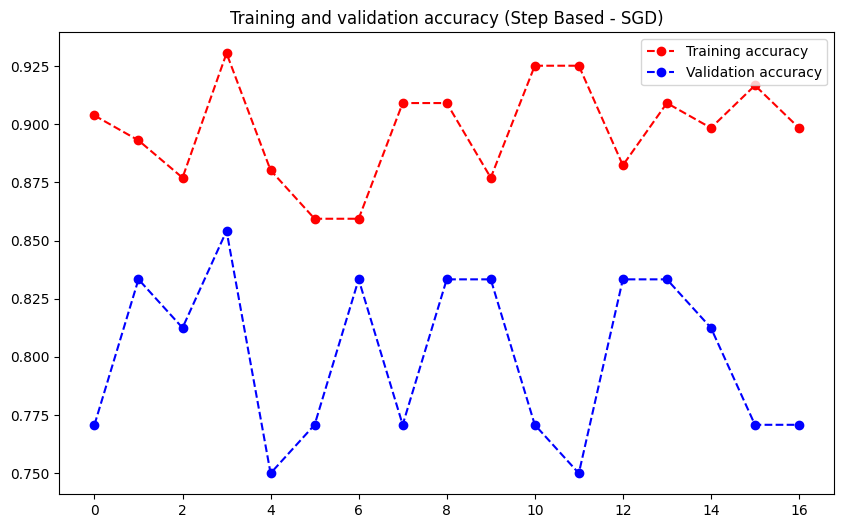

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'r', label='Training accuracy', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation accuracy (Step Based - SGD)')
plt.legend(loc=0)

plt.show()

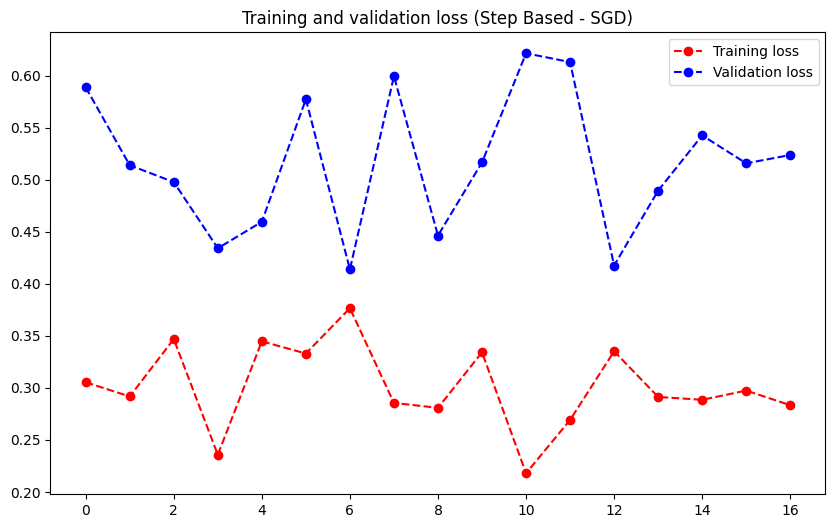

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label='Training loss', marker = 'o', linestyle = 'dashed')
plt.plot(epochs, val_loss, 'b', label='Validation loss', marker = 'o', linestyle = 'dashed')
plt.title('Training and validation loss (Step Based - SGD)')
plt.legend(loc=0)

plt.show()

### **Combined**

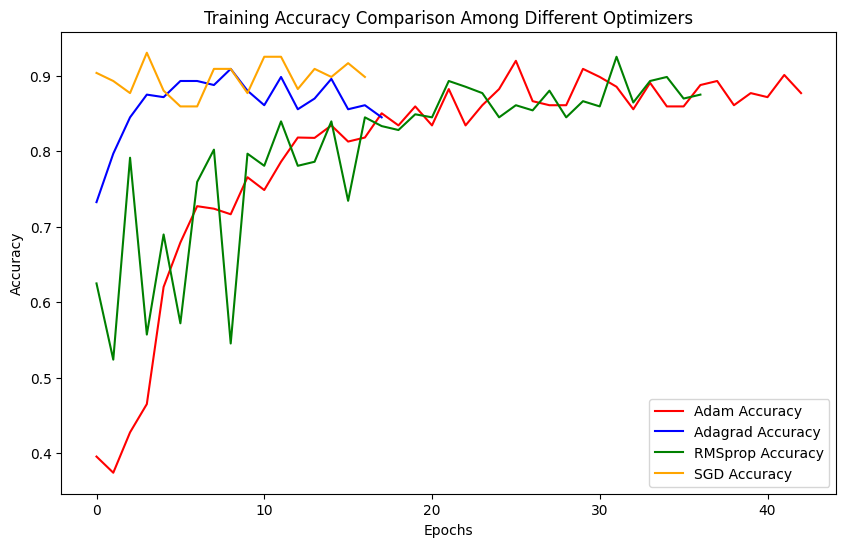

In [ ]:
plt.figure(figsize=(10, 6))

# Plot each accuracy list. Use range(len(acc_list)) for the x-axis
plt.plot(range(len(Adam_acc)), Adam_acc, 'red', label='Adam Accuracy')
plt.plot(range(len(Adagrad_acc)), Adagrad_acc, 'blue', label='Adagrad Accuracy')
plt.plot(range(len(RMSprop_acc)), RMSprop_acc, 'green', label='RMSprop Accuracy')
plt.plot(range(len(SGD_acc)), SGD_acc, 'orange', label='SGD Accuracy')

plt.title('Training Accuracy Comparison Among Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()